In [1]:
#imports 
%tensorflow_version 2.x
import tensorflow as tf 
from tensorflow import keras 
from sklearn.datasets import load_wine

#Help-liberies 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load the data
import pandas as pd
wine = pd.read_csv('winequality-red.csv',  sep=';',header=None)
print(np.shape(wine))
wine.head()




(1600, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6


In [3]:
#preparing data
#removing fist colum
wine = wine.drop([0], axis = 0)
wine = np.array(wine)




In [4]:
#splitting into train and test data
wine_train = wine[:1200]
wine_test = wine[1200:]

#splitting label and data
wine_train_x = wine_train[:,:11]
wine_train_y = wine_train[:,11:]

wine_test_x = wine_test[:,:11]
wine_test_y = wine_test[:,11:]


In [5]:
#normalizing data
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(wine[:,:11])

wine_train_x = scaler.transform(wine_train_x)
wine_test_x = scaler.transform(wine_test_x)

wine_train_y = wine_train_y.astype(int)
wine_test_y = wine_test_y.astype(int)


In [9]:
#creating Model



class Model:
      model = keras.Sequential()

      def __init__(self, layers, layersize):

        self.layers = layers
        self.layersize = layersize
        #initializing the model
        self.model = keras.Sequential()
      
        self.model.add(keras.Input(shape=(11,)))#input layer))
        for j in range(0, layers):
          self.model.add(keras.layers.Dense(layersize, activation="relu", kernel_initializer=keras.initializers.RandomNormal(stddev=0.005))) #hidden layers
        self.model.add(keras.layers.Dense(units=1, activation='linear')) #output layer
        #compile model
        self.model.compile(optimizer= tf.keras.optimizers.SGD(
    learning_rate=0.08) , 
                           loss= keras.losses.MeanSquaredError(),metrics=['MeanSquaredError'])  
        self.model.count_params()

      '''
      trains the model and returns a List of various data
      data[0] = the train loss after fitting the data 
      data[1] = the train accuracy after fitting the data  
      data[2] = the test loss after evaluating the model 
      data[3] = the test accuracy after evaluating the model  
      '''

      def train(self,epoch,train_images,train_labels,test_images, test_labels):
        data = np.zeros(4)
        print("epoch: ",epoch)

        #trainig the model until a certain accuracy is reached
        runs = 0
        train_loss = 100
        train_acc = 0
        e_per_run = 2
        while (train_loss > 0.005) and runs < epoch:
          history = self.model.fit(train_images, train_labels,epochs = e_per_run)
          train_loss_all, train_acc_all = history.history.values()
          train_loss = train_loss_all[e_per_run-1]
          train_acc = train_acc_all[e_per_run-1]
          runs = runs + e_per_run

        test_loss, test_acc = self.model.evaluate(test_images, test_labels, verbose=1)
        data[0] = train_loss
        data[1] = train_acc
        data[2] = test_loss
        data[3] = test_acc
        print(self.model.summary())
        return data

      def getParameter(self):
        return self.model.count_params()


In [7]:
def trainModel(amount,min_layersize,max_layersize, layers, epochs):
  a = max_layersize - min_layersize 
  data = np.zeros((5,a))
  w_b = []
  w_a = []

  
  '''
  data[0][i] = the train loss after fitting the data in iterration i (with i layers) 
  data[1][i] = the train accuracy after fitting the data in iterration i (with i layers)  
  data[2][i] = the test loss after evaluating the model in iterration i (with i layers) 
  data[3][i] = the test accuracy after evaluating the model in iterration i (with i layers) 
  data[4][i] = the parameters of the model in iterration i (with i layers)
  '''

  for i in range(0,max_layersize - min_layersize):
    data_help = [0,0,0,0,0]
    

    for j in range(0,amount):
      print("I an currently in run ",i, " ===> The model has ", i+ min_layersize ,"neurons. ")
      print("amount =", amount) 
      myModel = Model(layers,i + min_layersize)

      #getting the weight-Vectors between hiddenlayers
      layer_weights_bevor = myModel.model.layers[1].get_weights()[0]
      

      history = myModel.train(epochs,wine_train_x,wine_train_y,wine_test_x, wine_test_y)
      param   = myModel.getParameter()
      data_help[0] = data_help[0] + history[0] 
      data_help[1] = data_help[1] + history[1]
      data_help[2] = data_help[2] + history[2]
      data_help[3] = data_help[3] + history[3]
      data_help[4] = data_help[4] + param

      #getting the weight-Vectors between hiddenlayers after training 
      layer_weights_after = myModel.model.layers[1].get_weights()[0]

    #maby filtering runs, that went wrong
    w_b.append(layer_weights_bevor)
    w_a.append(layer_weights_after)

    data[0][i] = data_help[0]/amount
    data[1][i] = data_help[1]/amount
    data[2][i] = data_help[2]/amount
    data[3][i] = data_help[3]/amount
    data[4][i] = data_help[4]
  return w_b,w_a, data 

I an currently in run  0  ===> The model has  1 neurons. 
amount = 1
epoch:  20
Epoch 1/2
38/38 [==============================] - 0s 1ms/step - loss: 3.5555 - mean_squared_error: 3.5555
Epoch 2/2
38/38 [==============================] - 0s 2ms/step - loss: 0.6575 - mean_squared_error: 0.6575
Epoch 1/2
38/38 [==============================] - 0s 2ms/step - loss: 0.6534 - mean_squared_error: 0.6534
Epoch 2/2
38/38 [==============================] - 0s 2ms/step - loss: 0.6596 - mean_squared_error: 0.6596
Epoch 1/2
38/38 [==============================] - 0s 1ms/step - loss: 0.6558 - mean_squared_error: 0.6558
Epoch 2/2
38/38 [==============================] - 0s 1ms/step - loss: 0.6553 - mean_squared_error: 0.6553
Epoch 1/2
38/38 [==============================] - 0s 2ms/step - loss: 0.6571 - mean_squared_error: 0.6571
Epoch 2/2
38/38 [==============================] - 0s 2ms/step - loss: 0.6561 - mean_squared_error: 0.6561
Epoch 1/2
38/38 [==============================] - 0s 2ms/step -

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


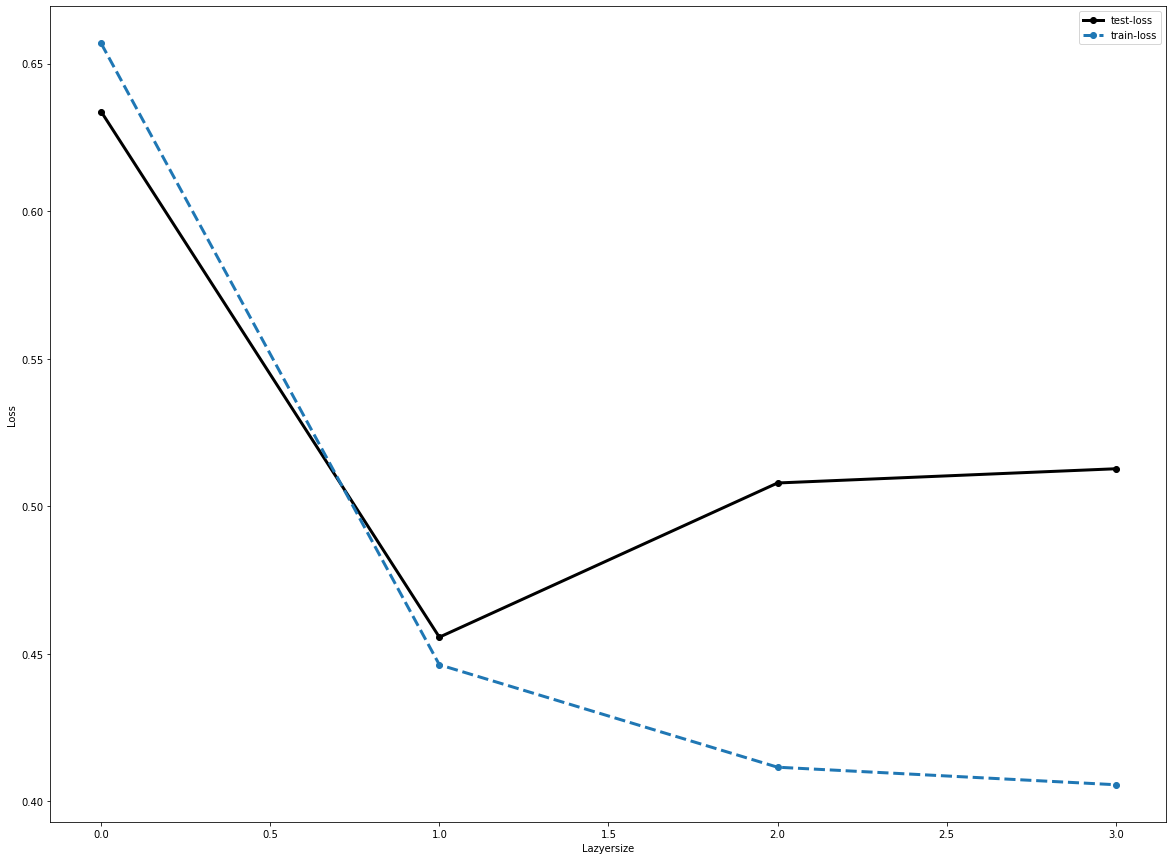

In [ ]:
lw_b, lw_a, data = trainModel(1,1,5,2,20)
print(np.shape(lw_a))
print(lw_a)

#plotting the kurve
fig, ax = plt.subplots(1)
fig.set_size_inches(20,15)

ax.plot(data[2], 'o' ,linewidth= 3.0, linestyle = '-', label = "test-loss", color = 'black' ) 
ax.plot(data[0], 'o' ,linewidth= 3.0, linestyle = '--', label = "train-loss") 
ax.set_xlabel("Lazyersize")
ax.set_ylabel("Loss")
    
ax.legend(loc='upper right')
plt.savefig("double_descent.png")



I an currently in run  0  ===> The model has  12000 neurons. 
amount = 1
epoch:  800
Epoch 1/2
38/38 [==============================] - 38s 965ms/step - loss: 2.2063 - mean_squared_error: 2.2063
Epoch 2/2
38/38 [==============================] - 37s 970ms/step - loss: 0.5707 - mean_squared_error: 0.5707
Epoch 1/2
38/38 [==============================] - 37s 987ms/step - loss: 0.4179 - mean_squared_error: 0.4179
Epoch 2/2
38/38 [==============================] - 38s 1s/step - loss: 0.4480 - mean_squared_error: 0.4480
Epoch 1/2
38/38 [==============================] - 37s 975ms/step - loss: 0.4077 - mean_squared_error: 0.4077
Epoch 2/2
38/38 [==============================] - 37s 965ms/step - loss: 0.4244 - mean_squared_error: 0.4244
Epoch 1/2
38/38 [==============================] - 37s 966ms/step - loss: 0.4800 - mean_squared_error: 0.4800
Epoch 2/2
38/38 [==============================] - 37s 970ms/step - loss: 0.3948 - mean_squared_error: 0.3948
Epoch 1/2
38/38 [=====================

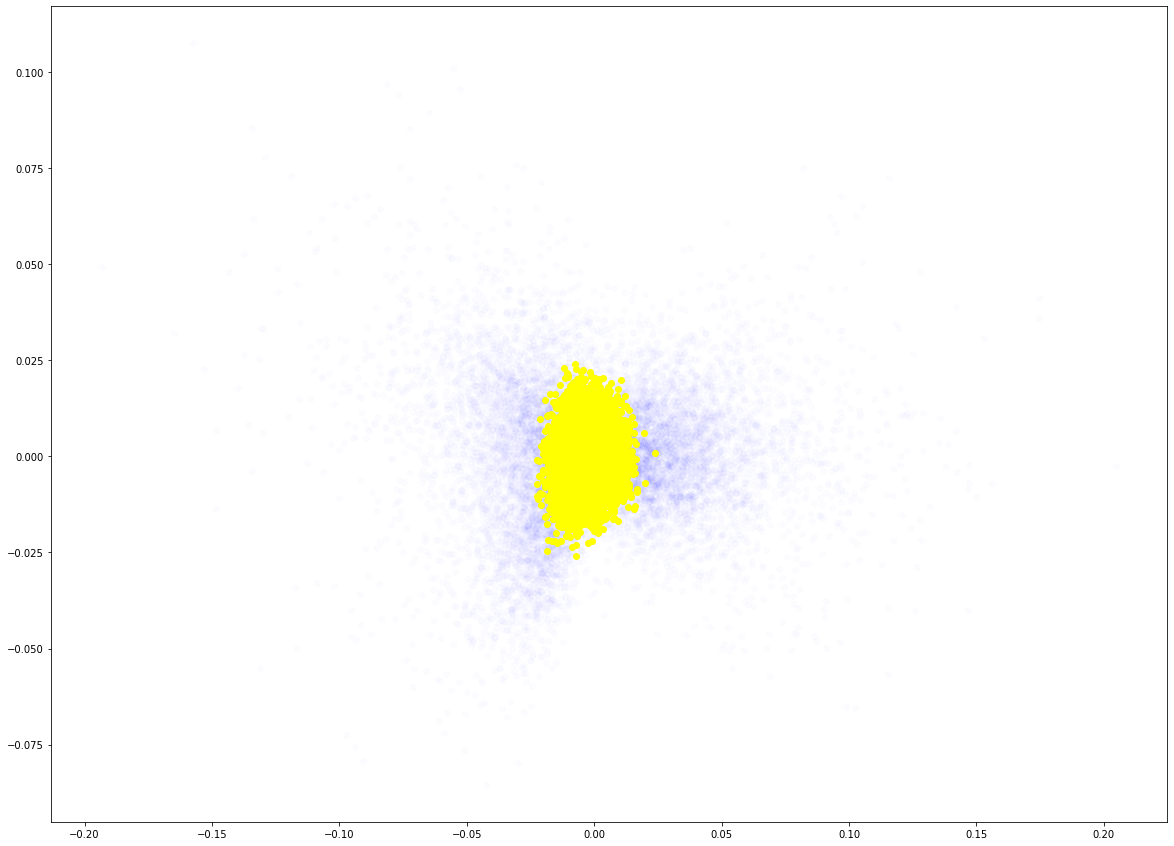

In [10]:
#k klustering 
from sklearn.decomposition import PCA


lw_b, lw_a, data = trainModel(1,12000,12001,2,800)

vectors_a = lw_a[(len(lw_a))-1]
vectors_b = lw_b[(len(lw_a))-1]
print(np.shape(vectors_b))

pca = PCA(n_components=3)
pca.fit(vectors_a)

transform_a = pca.transform(vectors_a)
transform_b = pca.transform(vectors_b)

fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(20,15)

ax.scatter(transform_a[:,0], transform_a[:,1], color = "blue", alpha = 0.01)
ax.scatter(transform_b[:,0], transform_b[:,1], color = "yellow")


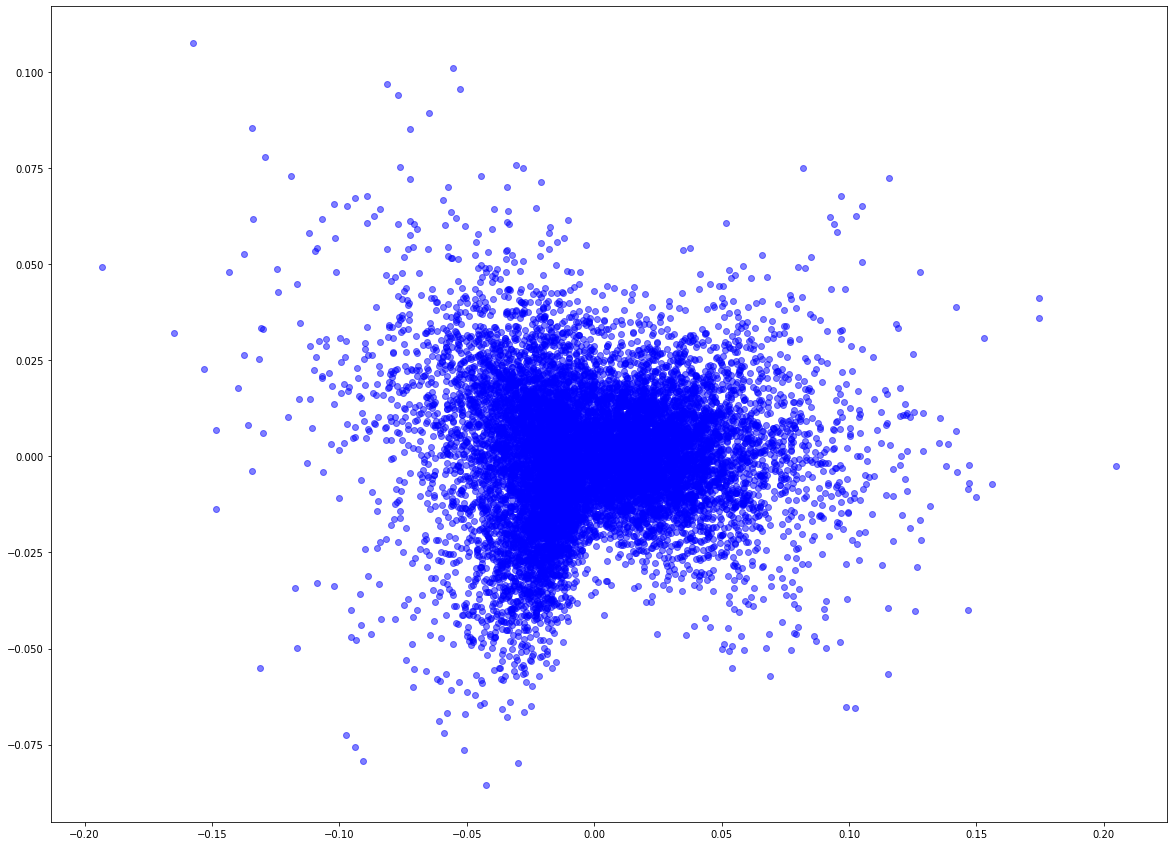

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
fig.set_size_inches(20,15)

ax.scatter(transform_a[:,0], transform_a[:,1], color = "blue", alpha = 0.5)
#ax.scatter(transform_b[:,0], transform_b[:,1], color = "yellow")
